In [2]:
import matplotlib.pyplot as plt

In [3]:
# baseline
n_threads = [1, 2, 4, 8, 16, 32, 64, 128]

time_baseline = [159.262283, 73.632486, 72.475199, 72.897560, 64.688773, 32.470856, 16.407813, 8.915693]
time_baseline_vec = [100.100467, 74.535718, 72.798266, 73.426153, 64.727578, 32.604691, 16.492679, 9.111600]
time_mem = [159.018762, 73.667442, 72.697178, 72.722697, 64.671205, 32.525025, 16.415571, 8.925082]
time_mem_vec = [97.711329, 73.892840, 72.352846, 72.962871, 64.632288, 32.482246, 16.523226, 8.955373]

print("Baseline:", sum(time_baseline))
print("Baseline vectorized:", sum(time_baseline_vec))
print("Memory:", sum(time_mem))
print("Memory vectorized:", sum(time_mem_vec))

Baseline: 500.7506629999999
Baseline vectorized: 443.79715200000004
Memory: 500.6429619999999
Memory vectorized: 439.5130190000001


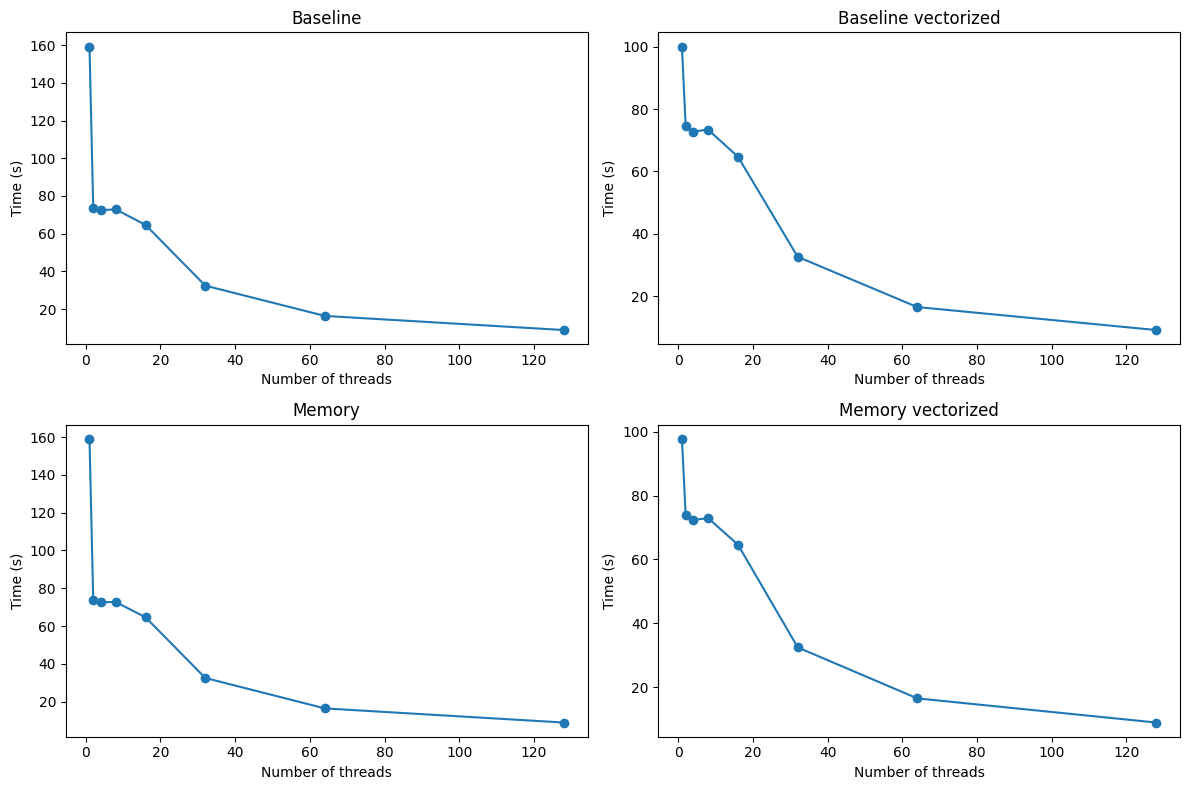

In [6]:
# 4 plots to show wach time, x is the number of threads, y is the time, x axis show the number of threads
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(n_threads, time_baseline, marker='o')
plt.title('Baseline')
plt.xlabel('Number of threads')
plt.ylabel('Time (s)')
plt.subplot(2, 2, 2)
plt.plot(n_threads, time_baseline_vec, marker='o')
plt.title('Baseline vectorized')
plt.xlabel('Number of threads')
plt.ylabel('Time (s)')
plt.subplot(2, 2, 3)
plt.plot(n_threads, time_mem, marker='o')
plt.title('Memory')
plt.xlabel('Number of threads')
plt.ylabel('Time (s)')
plt.subplot(2, 2, 4)
plt.plot(n_threads, time_mem_vec, marker='o')
plt.title('Memory vectorized')
plt.xlabel('Number of threads')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.show()

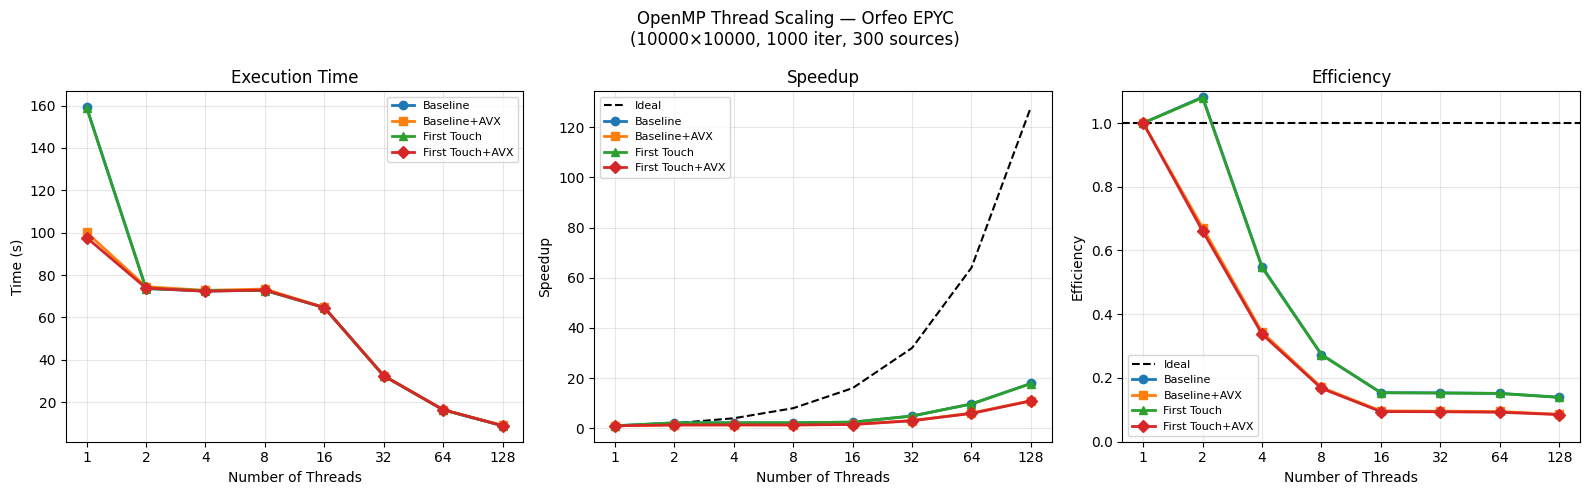

Saved: omp_scaling.png


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n_threads = [1, 2, 4, 8, 16, 32, 64, 128]

time_baseline     = [159.262283, 73.632486, 72.475199, 72.897560, 64.688773, 32.470856, 16.407813, 8.915693]
time_baseline_vec = [100.100467, 74.535718, 72.798266, 73.426153, 64.727578, 32.604691, 16.492679, 9.111600]
time_mem          = [159.018762, 73.667442, 72.697178, 72.722697, 64.671205, 32.525025, 16.415571, 8.925082]
time_mem_vec      = [ 97.711329, 73.892840, 72.352846, 72.962871, 64.632288, 32.482246, 16.523226, 8.955373]

labels  = ['Baseline', 'Baseline+AVX', 'First Touch', 'First Touch+AVX']
times   = [time_baseline, time_baseline_vec, time_mem, time_mem_vec]
colors  = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']

def compute_metrics(t):
    t1 = t[0]
    speedup    = [t1 / ti for ti in t]
    efficiency = [t1 / (n * ti) for n, ti in zip(n_threads, t)]
    return speedup, efficiency

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# --- Execution Time ---
ax = axes[0]
for label, t, c, m in zip(labels, times, colors, markers):
    ax.plot(n_threads, t, color=c, marker=m, label=label, linewidth=2)
ax.set_xscale('log', base=2)
ax.set_xticks(n_threads)
ax.set_xticklabels(n_threads)
ax.set_xlabel('Number of Threads')
ax.set_ylabel('Time (s)')
ax.set_title('Execution Time')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)

# --- Speedup ---
ax = axes[1]
ax.plot(n_threads, n_threads, 'k--', linewidth=1.5, label='Ideal')
for label, t, c, m in zip(labels, times, colors, markers):
    sp, _ = compute_metrics(t)
    ax.plot(n_threads, sp, color=c, marker=m, label=label, linewidth=2)
ax.set_xscale('log', base=2)
ax.set_xticks(n_threads)
ax.set_xticklabels(n_threads)
ax.set_xlabel('Number of Threads')
ax.set_ylabel('Speedup')
ax.set_title('Speedup')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)

# --- Efficiency ---
ax = axes[2]
ax.axhline(1.0, color='k', linestyle='--', linewidth=1.5, label='Ideal')
for label, t, c, m in zip(labels, times, colors, markers):
    _, eff = compute_metrics(t)
    ax.plot(n_threads, eff, color=c, marker=m, label=label, linewidth=2)
ax.set_xscale('log', base=2)
ax.set_xticks(n_threads)
ax.set_xticklabels(n_threads)
ax.set_xlabel('Number of Threads')
ax.set_ylabel('Efficiency')
ax.set_title('Efficiency')
ax.set_ylim(0, 1.1)
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)

plt.suptitle('OpenMP Thread Scaling — Orfeo EPYC\n(10000×10000, 1000 iter, 300 sources)',
             fontsize=12)
plt.tight_layout()
# plt.savefig('omp_scaling.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: omp_scaling.png")